# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Recommender systems use the concepts of Embedding layers of NLP

In [0]:
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn

## Let's import the dataset


In [0]:
# Get dataset https://www.kaggle.com/grouplens/movielens-20m-dataset?select=rating.csv

data = pd.read_csv('rating.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [0]:
data.userId = pd.Categorical(data.userId)
data["processed_userId"] = data.userId.cat.codes
data.head()

,userId,movieId,rating,timestamp,processed_userId
0,1,2,3.5,2005-04-02 23:53:47,0
1,1,29,3.5,2005-04-02 23:31:16,0
2,1,32,3.5,2005-04-02 23:33:39,0
3,1,47,3.5,2005-04-02 23:32:07,0
4,1,50,3.5,2005-04-02 23:29:40,0


In [0]:
data.movieId = pd.Categorical(data.movieId)
data["processed_movieId"] = data.movieId.cat.codes
data.head()

,userId,movieId,rating,timestamp,processed_userId,processed_movieId
0,1,2,3.5,2005-04-02 23:53:47,0,1
1,1,29,3.5,2005-04-02 23:31:16,0,28
2,1,32,3.5,2005-04-02 23:33:39,0,31
3,1,47,3.5,2005-04-02 23:32:07,0,46
4,1,50,3.5,2005-04-02 23:29:40,0,49


In [0]:
userId = data['processed_userId']
movieId = data['processed_movieId']
ratings = data['rating']

In [0]:
N = len(set(userId))
D = len(set(movieId))
E = 15 

In [0]:
u_layer = Input(shape=(1,))
m_layer = Input(shape=(1,))
u_embedding = Embedding(N, E)(u_layer)
m_embedding = Embedding(D, E)(m_layer)

# The output for embeddings is samples x T x E === samples x 1 x E migrated from NLP

u_embedding = Flatten()(u_embedding)
m_embedding = Flatten()(m_embedding)
# The output for flatten is samples x E === samples x E 

i_layer = Concatenate()([u_embedding, m_embedding])
h_layer = Dense(512, activation = 'relu')(i_layer)
h_layer = Dense(512, activation = 'relu')(h_layer)
o_layer = Dense(1)(h_layer)


In [0]:
model = Model([u_layer, m_layer], o_layer)

In [0]:
model.compile(loss = 'mse',
             optimizer = SGD(lr=0.1, momentum = 0.8))

In [0]:
# TRAIN TEST SPLIT
userId, movieId, ratings = sklearn.utils.shuffle(userId, movieId, ratings)
split = int(0.2 * len(ratings))
train_userId = userId[split:]
train_movieId = movieId[split:]
train_ratings = ratings[split:]

test_userId = userId[:split]
test_movieId = movieId[:split]
test_ratings = ratings[:split]

In [0]:
print(train_userId.shape)
print(train_movieId.shape)
print(train_ratings.shape)
print(test_userId.shape)
print(test_movieId.shape)
print(test_ratings.shape)

(16000211,)
(16000211,)
(16000211,)
(4000052,)
(4000052,)
(4000052,)


In [0]:
normalizer_ratings = train_ratings.mean()
train_ratings = train_ratings - normalizer_ratings
test_ratings = test_ratings - normalizer_ratings

In [0]:
report = model.fit(x = [train_userId, train_movieId],
                   y = train_ratings,
                   epochs = 20, 
                   batch_size = 2048, 
                   validation_data = ([test_userId, test_movieId], test_ratings)) 

Epoch 1/20
7813/7813 [==============================] - 135s 17ms/step - loss: 0.7708 - val_loss: 0.7437
Epoch 2/20
7813/7813 [==============================] - 138s 18ms/step - loss: 0.7174 - val_loss: 0.7083
Epoch 3/20
7813/7813 [==============================] - 140s 18ms/step - loss: 0.6933 - val_loss: 0.6963
Epoch 4/20
7813/7813 [==============================] - 138s 18ms/step - loss: 0.6822 - val_loss: 0.6911
Epoch 5/20
7813/7813 [==============================] - 137s 18ms/step - loss: 0.6735 - val_loss: 0.6852
Epoch 6/20
7813/7813 [==============================] - 136s 17ms/step - loss: 0.6647 - val_loss: 0.6783
Epoch 7/20
7813/7813 [==============================] - 141s 18ms/step - loss: 0.6570 - val_loss: 0.6743
Epoch 8/20
7813/7813 [==============================] - 145s 19ms/step - loss: 0.6508 - val_loss: 0.6731
Epoch 9/20
7813/7813 [==============================] - 147s 19ms/step - loss: 0.6456 - val_loss: 0.6694
Epoch 10/20
7813/7813 [==============================] 

## let's see the results

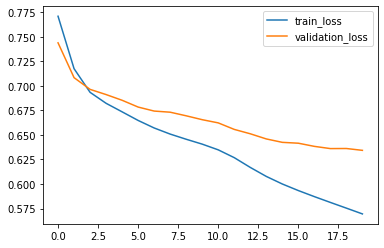

In [0]:
plt.plot(report.history['loss'], label="train_loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()
plt.show()